In [2]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Multiple Layer GRU

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.1.0


In [4]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.1.0


In [5]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


In [6]:
tokenizer = info.features['text'].encoder

In [7]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

# 20200418 见https://github.com/tensorflow/datasets/issues/1278
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
# train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
# test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 100s 257ms/step - loss: 0.4424 - accuracy: 0.7954 - val_loss: 0.3170 - val_accuracy: 0.8760
Epoch 2/10
391/391 [==============================] - 98s 250ms/step - loss: 0.2239 - accuracy: 0.9166 - val_loss: 0.3084 - val_accuracy: 0.8786
Epoch 3/10
391/391 [==============================] - 92s 235ms/step - loss: 0.1735 - accuracy: 0.9360 - val_loss: 0.3353 - val_accuracy: 0.8701
Epoch 4/10
391/391 [==============================] - 94s 241ms/step - loss: 0.1398 - accuracy: 0.9511 - val_loss: 0.3779 - val_accuracy: 0.8632
Epoch 5/10
391/391 [==============================] - 94s 240ms/step - loss: 0.1142 - accuracy: 0.9610 - val_loss: 0.4473 - val_accuracy: 0.8609
Epoch 6/10
391/391 [==============================] - 93s 238ms/step - loss: 0.0927 - accuracy: 0.9689 - val_loss: 0.4955 - val_accuracy: 0.8590
Epoch 7/10
391/391 [==============================] - 96s 246ms/step - loss: 0.0741 - accuracy: 0.9758 - val_loss: 0.5393 - val_a

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

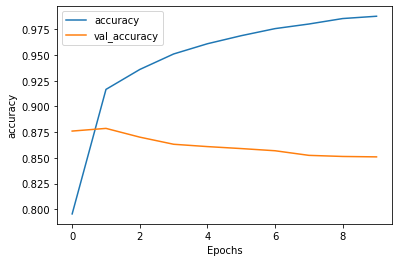

In [15]:
plot_graphs(history, 'accuracy')

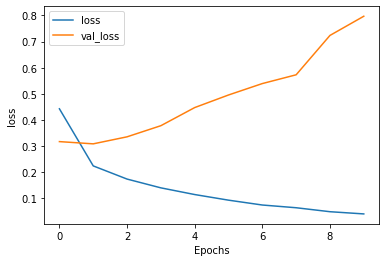

In [16]:
plot_graphs(history, 'loss')